# Hercules CTD vs. Honeybear T

In [125]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [126]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import time

import matplotlib

import pandas as pd

import dateutil.parser

from io import StringIO

import os



In [127]:
os.chdir('data')
#os.chdir('raw_honeybear')
!ls

FileNotFoundError: [Errno 2] No such file or directory: 'data'

<IPython.core.display.Javascript object>


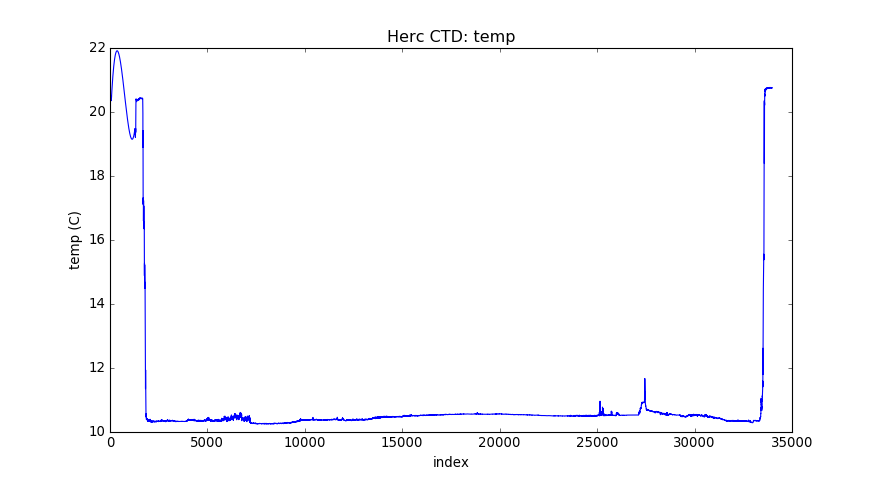

In [128]:
log=pd.read_csv('H1547.CTD.sampled.tsv',delimiter='\t',names=['date','temp','a','b','c','d','e','f'])

y_ctd=log.temp.tolist()

fig_ctd,ax_ctd=plt.subplots()
ax_ctd.plot(y_ctd)

ax_ctd.set_title('Herc CTD: temp')
ax_ctd.set_xlabel('index')
ax_ctd.set_ylabel('temp (C)')


<IPython.core.display.Javascript object>


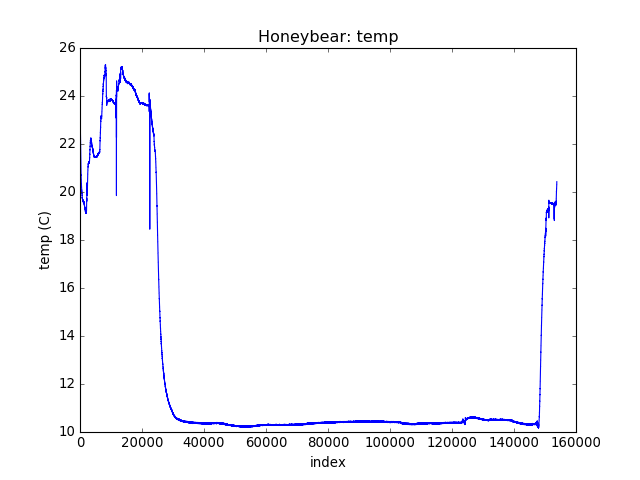

In [28]:
bear=pd.read_csv('td_bear_cast1_temppress_H1547.txt',delimiter=' ',names=['time','pressure','temp'])

y_bear=bear.temp.tolist()

fig_bear,ax_bear=plt.subplots()
ax_bear.plot(y_bear)

ax_bear.set_title('Honeybear: temp')
ax_bear.set_xlabel('index')
ax_bear.set_ylabel('temp (C)')

# Match timestamps ...

<IPython.core.display.Javascript object>


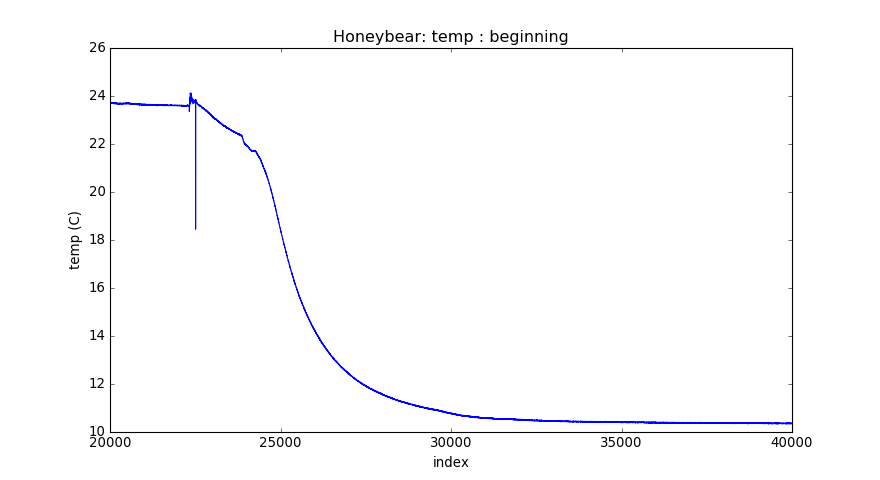

In [129]:
fig_bear_begin,ax_bear_begin=plt.subplots()
ax_bear_begin.plot(y_bear)
ax_bear_begin.set_xlim([20000,40000])
ax_bear_begin.set_title('Honeybear: temp : beginning')
ax_bear_begin.set_xlabel('index')
ax_bear_begin.set_ylabel('temp (C)')

<IPython.core.display.Javascript object>


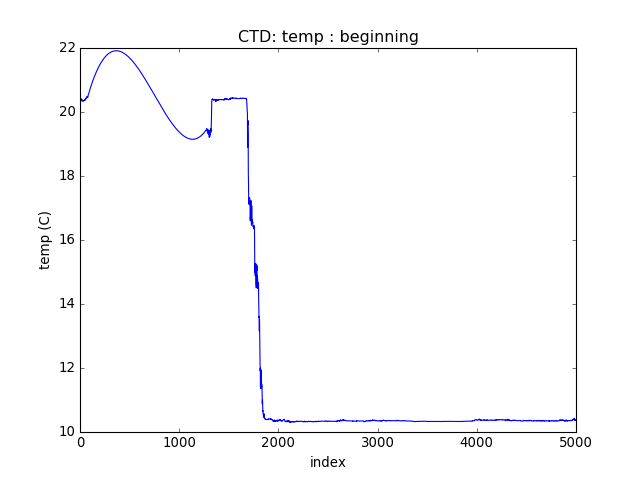

In [32]:
fig_ctd_begin,ax_ctd_begin=plt.subplots()
ax_ctd_begin.plot(y_ctd)
ax_ctd_begin.set_xlim([0,5000])
ax_ctd_begin.set_title('CTD: temp : beginning')
ax_ctd_begin.set_xlabel('index')
ax_ctd_begin.set_ylabel('temp (C)')

In [176]:
ctd_begin=1680
bear_begin=24290
#bear_begin=22563
#bear_begin=26000

<IPython.core.display.Javascript object>


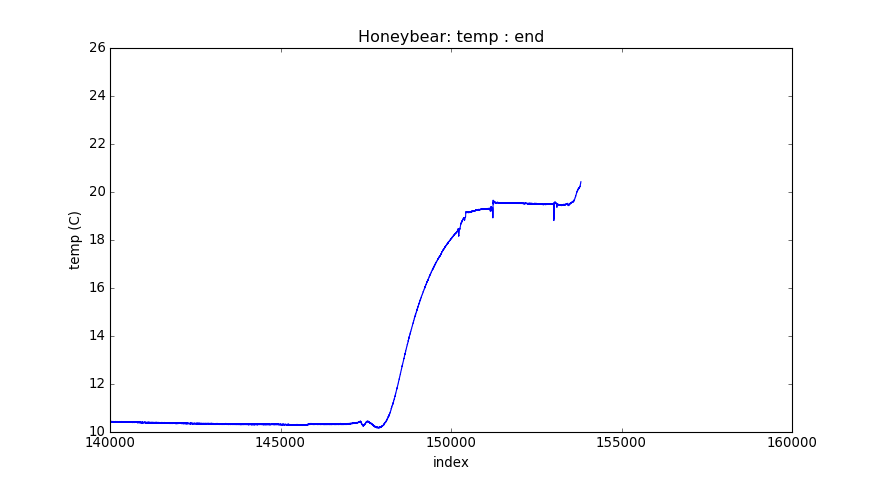

In [177]:
fig_bear_end,ax_bear_end=plt.subplots()
ax_bear_end.plot(y_bear)
ax_bear_end.set_xlim([1.4E5,1.6E5])
ax_bear_end.set_title('Honeybear: temp : end')
ax_bear_end.set_xlabel('index')
ax_bear_end.set_ylabel('temp (C)')

In [178]:
#bear_end=150300
bear_end=147920

<IPython.core.display.Javascript object>


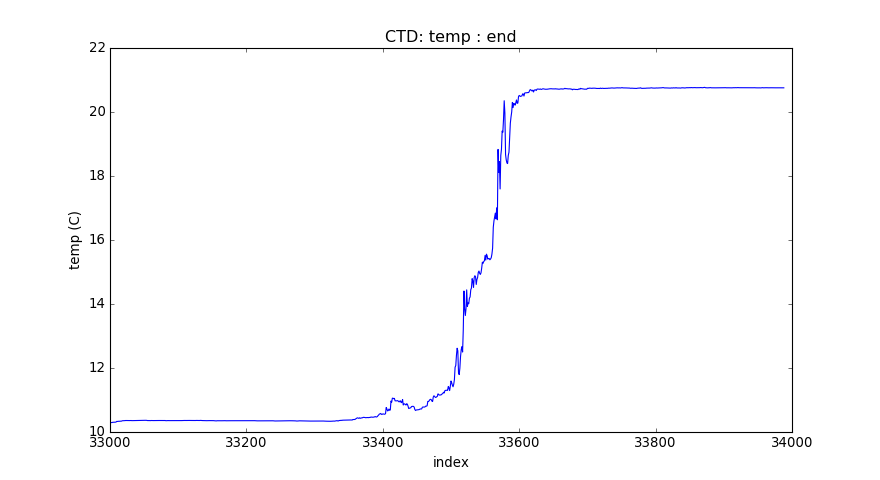

In [165]:
fig_ctd_end,ax_ctd_end=plt.subplots()
ax_ctd_end.plot(y_ctd)
ax_ctd_end.set_xlim([33000,34000])
ax_ctd_end.set_title('CTD: temp : end')
ax_ctd_end.set_xlabel('index')
ax_ctd_end.set_ylabel('temp (C)')

In [179]:
#ctd_end=33593
ctd_end=33454

In [180]:
m=(ctd_end-ctd_begin)/(bear_end-bear_begin)
m

0.25700881663026776

In [181]:
index=ctd_begin
ctd_index=[]
bear_index=[]

bear_sub=y_bear[bear_begin:bear_end]
ctd_sub=y_ctd[ctd_begin:ctd_end]

for i in range(0,len(bear_sub)):
    bear_index.append(i)

for i in range(0,len(ctd_sub)):
    ctd_index.append(i/m)
    
print(len(ctd_index),len(bear_index))

31774 123630


<IPython.core.display.Javascript object>


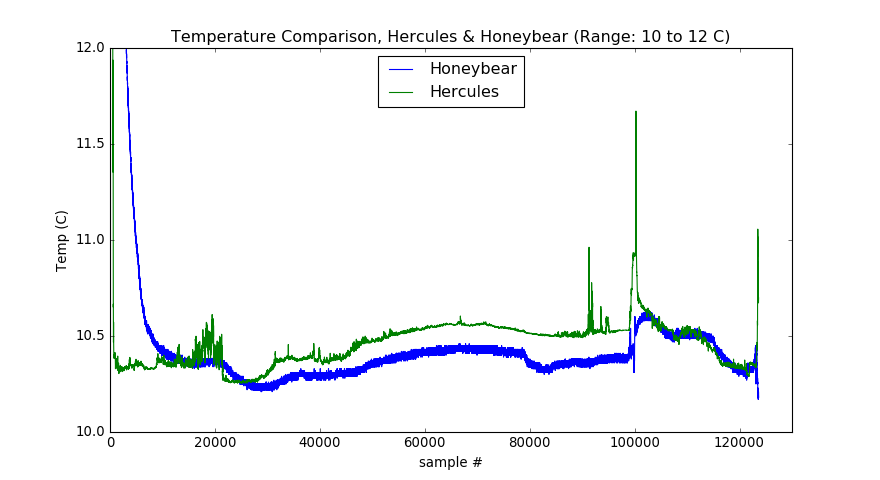

In [205]:
fig_overlay,ax_overlay=plt.subplots()
ax_overlay.plot(bear_index,bear_sub,label="Honeybear")
ax_overlay.plot(ctd_index,ctd_sub,label="Hercules")
ax_overlay.set_ylim([10,12])
ax_overlay.set_title('Temperature Comparison, Hercules & Honeybear (Range: 10 to 12 C)')
ax_overlay.set_xlabel('sample #')
ax_overlay.set_ylabel('Temp (C)')
ax_overlay.legend(loc="upper center")
ax_overlay.set_xlim(0,130000)
matplotlib.rcParams['figure.figsize'] = (11.,6.)

<IPython.core.display.Javascript object>


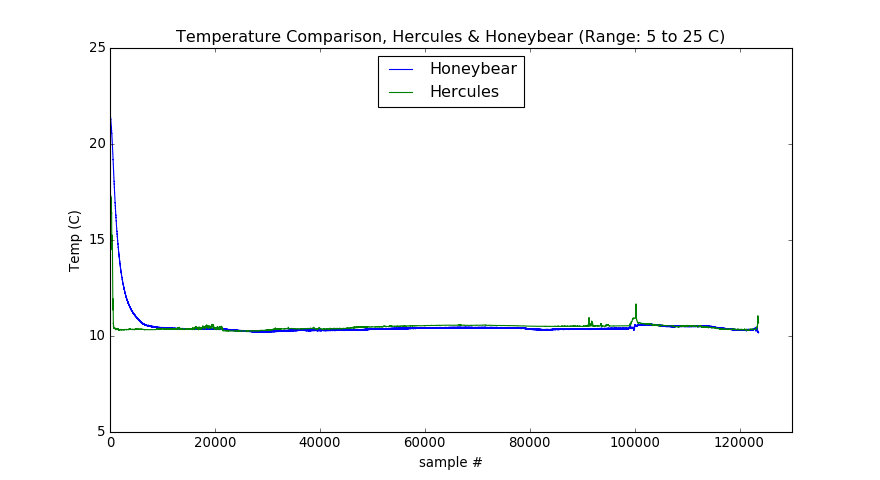

In [202]:
fig_overlay,ax_overlay=plt.subplots()
ax_overlay.plot(bear_index,bear_sub,label="Honeybear")
ax_overlay.plot(ctd_index,ctd_sub,label="Hercules")
ax_overlay.set_ylim([5,25])
ax_overlay.set_title('Temperature Comparison, Hercules & Honeybear (Range: 5 to 25 C)')
ax_overlay.set_xlabel('sample #')
ax_overlay.set_ylabel('Temp (C)')
ax_overlay.legend(loc="upper center")
ax_overlay.set_xlim(0,130000)
matplotlib.rcParams['figure.figsize'] = (11.,6.)